In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as slt
import seaborn as sns
import joblib
import mlem
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np


path="https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/formart_house.csv"

df=pd.read_csv(path)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [44]:
df=df.iloc[:-1,:]

In [45]:
df=df.astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<Axes: title={'center': 'Heatmap'}>

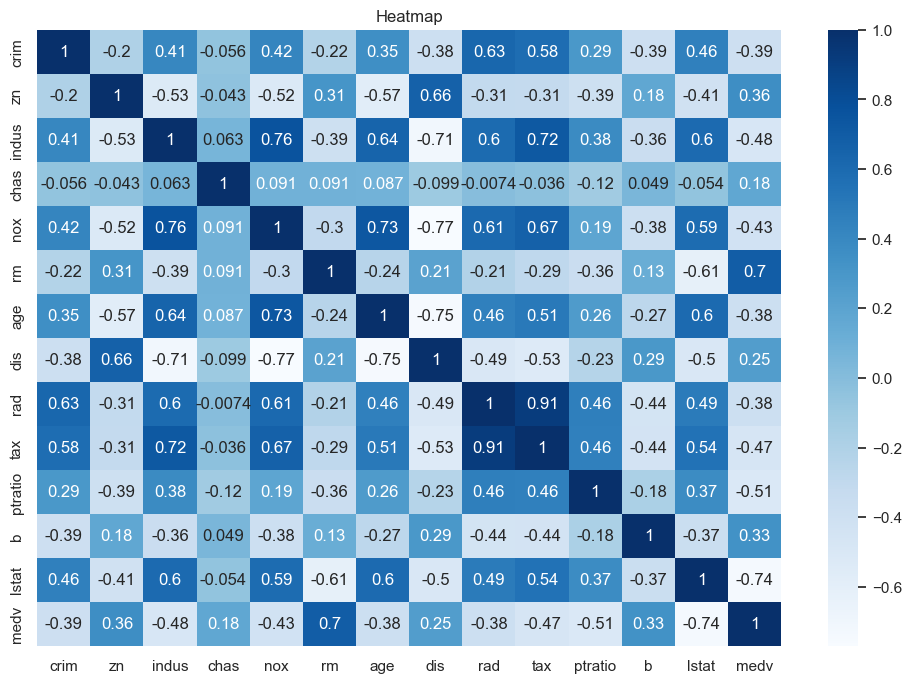

In [47]:
plt.figure(figsize=(12,8))
plt.title('Heatmap')
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [48]:
X=df.drop("medv",axis=1)
y=df["medv"]
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=677)

In [50]:
X_train.shape,X_test.shape

((404, 13), (102, 13))

In [51]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [52]:
model.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred=model.predict(X_test)

In [54]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [55]:
r2_score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)


In [56]:
print('R2_score:',r2_score)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE :',rmse)

R2_score: 0.7001538327665633
MAE : 3.5160766488439323
MSE : 26.96660596857022
RMSE : 5.192938086340932


In [57]:
model.predict

<bound method LinearModel.predict of LinearRegression()>

In [58]:
joblib.dump(model,'regression_test.pkl')

['regression_test.pkl']

In [59]:
newmodel=joblib.load('regression_test.pkl')

In [64]:
newmodel.predict([[600,20,300,40,20,1,7,2,6,10,11,12,10]])[0]

c:\Users\libero.bo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-226.19751973941493

In [65]:
mlem.api.save(model,'model_',sample_data=X_train)

MlemModel(location=Location(path='c:/Users/libero.bo/Desktop/Maya/Python/Prova_esame-03_05_23/model_.mlem', project=None, rev=None, uri='file://c:/Users/libero.bo/Desktop/Maya/Python/Prova_esame-03_05_23/model_.mlem', project_uri=None, fs=<fsspec.implementations.local.LocalFileSystem object at 0x000001FCD3640C70>), params={}, artifacts={'data': LocalArtifact(uri='model_', size=782, hash='6e95bcc0a51b963f08e46ec7c0e6df03')}, requirements=Requirements(__root__=[InstallableRequirement(module='sklearn', version='1.2.2', package_name='scikit-learn', extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='pandas', version='1.5.3', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='numpy', version='1.24.2', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None)]), processors_cache={'model': SklearnModel(model=LinearRegression(), io=SimplePickleIO(), methods={'predict':

In [66]:
new_model_mlem=mlem.api.load('model_.mlem')

In [68]:
new_model_mlem.predict([[600,20,300,40,20,1,7,2,6,10,11,12,10]])

c:\Users\libero.bo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-226.19751974])